# Chicago Car Crash Analysis

## Overview
This project analyzes traffic crash data from Chicago's Open Data Portal to identify patterns and factors contributing to fatal and serious vehicle crashes. By leveraging datasets on crash incidents, involved people, and vehicles, the analysis provides actionable insights into high-risk conditions and behaviors. The results aim to inform public safety initiatives and reduce traffic incidents through data-driven decisions.


<img src="./images/chicago_header_image.jpg" width="1280" height="640">

*Photo by [Sawyer Bengtson](https://unsplash.com/@sawyerbengtson) on Unsplash*
___

## Table of Contents

### 1. [Business Understanding](#Business-Understanding)
* 1.1 [Background](#Background)
* 1.2 [Goals](#Goals)
* 1.3 [Success Criteria](#Success-Criteria)
   
### 2. [Data Understanding](#Data-Understanding)


### 3. [Data Preparation](#Data-Preparation)

### 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### 5. [Modeling](#Modeling)


### 6. [Evaluation](#Evaluation)

### 7. [Conclusion](#Conclusion)
* 7.1 [Limitations](#Limitations)
* 7.2 [Recommendations](#Recommendations)
* 7.3 [Next Steps](#Next-Steps)

### 8. [References](#References)

## 1. <a name ="Business-Understanding"></a> Business Understanding

### 1.1 <a name ="Background"></a> Background 

[Vision Zero](https://visionzeronetwork.org/about/what-is-vision-zero/) is a traffic safety initiative aimed at eliminating traffic deaths. Despite pledges from many U.S. cities, traffic fatalities remain a persistent issue. In 2024, Illinois recorded 1,111 traffic deaths, with 361 in Cook County (including Chicago) ([source](https://apps.dot.illinois.gov/FatalCrash/snapshot.html)). Traffic safety is also an equity issue, as Black and Brown communities, particularly in urban areas like Chicago and Philadelphia, experience disproportionately high traffic fatalities. Analysis from the Philadelphia Department of Public Health reveals that zip codes with higher poverty rates also have higher traffic crash hospitalization rates (City of Philadelphia, 2024). These communities often face underinvestment in infrastructure, contributing to these disparities. 

One distinguishing aspect of traffic fatalities is that they are largely preventable. Existing research highlights speed as one of the leading contributors to traffic deaths, with speed often seen as a critical factor in the severity of crashes. This raises the question: How do we get drivers to slow down? The deeper issue becomes a question of behavior change, which is much trickier to address. Different strategies have been employed to varying degrees, but there is often debate over the most effective methods to achieve meaningful change in driver behavior, such as the use of speed cushions, lowering speed limits, trimming lane size, or increasing police presence in high-speed areas.

Through my involvement with the [City of Philadelphia’s Vision Zero Ambassadors](https://visionzerophl.com/get-involved/) program, I gained extensive domain knowledge and firsthand experience in community engagement, where I worked to raise awareness and drive actions toward traffic safety in underserved neighborhoods. This work provided me with a deeper understanding of the challenges faced by vulnerable communities and the importance of strategic, data-driven interventions in reducing traffic fatalities.

### 1.2 <a name ="Goals"></a> Goals

The goal of this project is to develop a model that predicts whether a crash resulted in serious or fatal injuries. For the purposes of this project, ‘serious’ injuries refer to ‘incapacitating’ injuries, as defined by Chicago’s Department of Transportation (CDOT). CDOT defines incapacitating injuries as injuries that prevent an individual from walking, driving, or performing normal activities. 

By predicting crash severity, the model will help identify which factors—such as speed, road conditions, road design, enforcement, and vehicle type & size—are most strongly associated with the outcomes. In line with existing research that highlights speed as a key factor in the severity of crashes, the model will also provide insight into how speed, alongside other factors, contributes to traffic fatalities and serious injuries.


The model will be designed to be easily interpretable, meaning it will provide clear and understandable explanations for how it arrives at its predictions. This is crucial for decision-makers, as it allows them to trust the model’s results and use it to guide traffic safety policies and resource allocation. An easily interpretable model will help agencies like CDOT and the Chicago Metropolitan Agency for Planning (CMAP) target resources more effectively, allow policymakers to evaluate the impact of different safety strategies, and help make informed decisions about where to focus their efforts. Ultimately, this model will assist in making data-driven decisions that reduce fatalities and improve the overall safety of Chicago’s roadways.

### 1.3 <a name ="Success-Criteria"></a> Success Criteria

The success of this project will be determined by how easily the model can explain its predictions and which features are driving the outcomes. Although the focus is on model interpretability, measuring the model’s ability to accurately predict whether a crash resulted in serious or fatal injuries is also a key success criterion, as it provides information about how confident we can be about the results. Since this will be treated as a classification problem (i.e., classifying a crash to have fatal/serious injuries or not), classification metrics that I will measure are accuracy, precision, recall, and F1.


The model will be considered successful if it achieves moderate accuracy (e.g., between 65% and 80%) and provides clear, actionable insights that guide traffic safety policies and resource allocation. This moderate accuracy ensures that the insights gained from the model are trustworthy enough for stakeholders to implement targeted interventions effectively.

## 2. <a name ="Data-Understanding"></a> Data Understanding

The data for this project came from the city of [Chicago's Data Portal](https://data.cityofchicago.org/). The datasets involved are updated regularly, with the most recent update on Dec 12, 2024, and the earliest recorded data dating back to March 2023. More on each dataset:
1. [Traffic Crashes - Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data): Contains detailed information about each traffic crash that occurred within the City of Chicago.
    * Total of **901k** observations with **48** features.
        * Includes fields such as crash date, crash location, weather conditions, road conditions, and contributing factors like speed limits.
    * Unique identifier for each crash is the `CRASH_RECORD_ID`.
<br><br>

2. [Traffic Crashes - People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data): Provides information about individuals involved in a traffic crash, including details about their injuries 
    * Total of **1.98M** observations with **29** features.
        * Each record corresponds to an occupant in a vehicle listed in the Crash dataset, and it includes data such as the type of injury, role (driver, passenger, pedestrian, etc.), and whether the individual sustained any injuries.
    * The unique identifier for each record is `CRASH_RECORD_ID`.
<br><br>

3. [Traffic Crashes - Vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data): Contains information about the vehicle(s) involved in traffic crashes. 
   
    * Total of **1.84M** observations with **71** features.
        * Each “unit” involved in a crash (e.g., motor vehicles, bicycles, pedestrians) is assigned a record. 
        * Information about the vehicle type, damage, and trajectory, as well as the relationship with the individuals involved (drivers, passengers, pedestrians).
        
    * Links to the `Crash` and `People` datasets using the `CRASH_RECORD_ID`. 

### 2.1 Importing Necessary Libraries and Data

In [1]:
# for getting data
import os
import zipfile

# for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# for modeling

In [2]:
# Sets environment variable to point to the location of kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = './config' 

In [3]:
# Check if the KAGGLE_CONFIG_DIR environment variable is set
print(os.getenv('KAGGLE_CONFIG_DIR'))

./config


In [4]:
# Information about the dataset
dataset_name = 'ckucewicz/Chicago-Traffic-Data'
zip_filename = 'Chicago-Traffic-Data.zip' 
download_path = './data'
unzip_path = './data'

# Step 1: Downloads dataset from Kaggle, if not already downloaded
dataset_path = os.path.join(download_path, zip_filename)
if not os.path.exists(dataset_path):
    print(f"Downloading {dataset_name}...")
    os.system(f"kaggle datasets download -d {dataset_name} --path {download_path}")
else:
    print(f"{dataset_name} already downloaded.")

# Step 2: Unzips the downloaded file
print(f"Unzipping {zip_filename}...")
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

# Step 3: Loads the CSV files into pandas dataframes
csv_filenames = ['people.csv', 'traffic_crashes.csv', 'vehicles.csv']
dataframes = {}
for csv_filename in csv_filenames:
    csv_file = os.path.join(unzip_path, csv_filename)
    print(f"Loading CSV: {csv_filename}...")
    
    # Creates a variable name based on the CSV filename
    dataframe_name = csv_filename.split('.')[0]
    
    # Stores the dataframe in the dictionary
    dataframes[dataframe_name] = pd.read_csv(csv_file, low_memory = False)

     # Prints "Complete" once the CSV is successfully loaded
    print(f"Loading of {dataframe_name} complete.")
    print("-" * 50)

# stores each dataset in its own variable
people_df = dataframes['people']
traffic_crashes_df = dataframes['traffic_crashes']
vehicles_df = dataframes['vehicles']

ckucewicz/Chicago-Traffic-Data already downloaded.
Unzipping Chicago-Traffic-Data.zip...
Loading CSV: people.csv...
Loading CSV: traffic_crashes.csv...
Loading CSV: vehicles.csv...


### 2.2 Data Understanding Function

In [7]:
# Dataset understanding function
def dataset_understanding(dataset_path, date_col=None):
    """
    Automates the process of understanding the structure and contents of a given dataset.

    This function provides an overview of the dataset by:
    - Loading the dataset from a specified CSV file.
    - Displaying the first few rows of the dataset.
    - Printing information about the columns and data types.
    - Calculating and displaying the percentage of missing values for each feature.
    - Displaying the value counts and number of unique values for each feature.
    - Plotting histograms for numeric features and bar charts for categorical features.
    - Analyzing a date column (if specified) to identify the earliest and latest dates.

    Parameters:
    dataset_path (str): The path to the dataset CSV file to be analyzed.
    date_col (str, optional): The name of the column containing date values to analyze. 
                              If provided, the function will calculate the earliest and latest dates.

    Returns:
    pandas.DataFrame: The loaded DataFrame with the dataset contents.
    
    """
    # Read the dataset
    print(f"Loading dataset from {dataset_path}...\n")
    df = pd.read_csv(dataset_path, low_memory=False)
    
    # Print the first 5 rows
    print("First 5 rows of the dataset:\n")
    print(df.head(), "\n")
    
    # Print info about columns
    print("DataFrame Info:\n")
    print(df.info(), "\n")
    
    # Calculate and print percentage of missing values
    print("Percentage of missing values in each feature:\n")
    print(round((df.isna().sum() / len(df) * 100), 2), "\n")
    
    # Loop through features and print value counts and unique values
    print("Value counts and number of unique values for each feature:\n")
    for feature in df.columns:
        print(f"Value counts for column '{feature}':")
        print(df[feature].value_counts())
        print(f"Number of unique values: {df[feature].nunique()}\n")
        print("-" * 50, "\n")
    
    # Plot histograms for numeric features
    numeric_cols = df.select_dtypes(include='number').columns
    print("Plotting histograms for numeric features...\n")
    df[numeric_cols].hist(bins=20, figsize=(12, 10))
    plt.tight_layout()
    plt.show()
    
    # Plot bar charts for categorical features (top 20 categories)
    categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'CRASH_RECORD_ID']
    print("Plotting bar charts for categorical features (top 20 categories)...\n")
    n_cols = 3
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        top_categories = df[col].value_counts().head(20)
        top_categories.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'Bar Chart of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=0)
    
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Analyze date column for earliest and latest dates if provided
    if date_col:
        print(f"Analyzing date column '{date_col}'...\n")
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        earliest_date = df[date_col].min()
        latest_date = df[date_col].max()
        print(f"Earliest {date_col}: {earliest_date}")
        print(f"Latest {date_col}: {latest_date}\n")
    
    return df

### 2.2.1 Crashes Dataset

Loading dataset from ./data/traffic_crashes.csv...

First 5 rows of the dataset:

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM                  15                  OTHER   
1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION LIGH

Number of unique values: 901446

-------------------------------------------------- 

Value counts for column 'CRASH_DATE_EST_I':
Y    57991
N     8540
Name: CRASH_DATE_EST_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Value counts for column 'CRASH_DATE':
12/29/2020 05:00:00 PM    30
11/10/2017 10:30:00 AM    27
02/17/2022 03:30:00 PM    21
11/21/2024 10:30:00 AM    20
11/21/2024 10:00:00 AM    20
                          ..
12/23/2016 12:41:00 PM     1
10/03/2020 05:32:00 PM     1
08/02/2021 05:15:00 PM     1
01/08/2020 02:35:00 PM     1
09/13/2023 01:08:00 PM     1
Name: CRASH_DATE, Length: 592919, dtype: int64
Number of unique values: 592919

-------------------------------------------------- 

Value counts for column 'POSTED_SPEED_LIMIT':
30    664045
35     59626
25     57789
20     37717
15     32112
10     21096
40      8612
0       7584
45      5951
5       4957
55       883
50       276
3        221
9         96
39        95

OVER $1,500      567704
$501 - $1,500    232614
$500 OR LESS     101128
Name: DAMAGE, dtype: int64
Number of unique values: 3

-------------------------------------------------- 

Value counts for column 'DATE_POLICE_NOTIFIED':
12/01/2023 05:30:00 PM    12
10/12/2020 04:00:00 PM    12
02/26/2020 08:30:00 AM    12
02/24/2023 11:00:00 PM    11
02/14/2020 05:00:00 PM    11
                          ..
09/10/2021 11:58:00 AM     1
03/21/2019 07:07:00 PM     1
09/16/2023 06:48:00 AM     1
08/30/2017 12:05:00 PM     1
07/12/2020 06:45:00 PM     1
Name: DATE_POLICE_NOTIFIED, Length: 682850, dtype: int64
Number of unique values: 682850

-------------------------------------------------- 

Value counts for column 'PRIM_CONTRIBUTORY_CAUSE':
UNABLE TO DETERMINE                                                                 352689
FAILING TO YIELD RIGHT-OF-WAY                                                        99589
FOLLOWING TOO CLOSELY                                                        

W    322771
S    301079
N    216752
E     60840
Name: STREET_DIRECTION, dtype: int64
Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'STREET_NAME':
WESTERN AVE        24619
PULASKI RD         21778
CICERO AVE         20285
ASHLAND AVE        19606
HALSTED ST         17440
                   ...  
FRANKLIN SD            1
LACEY AVE              1
STETSON SUB AVE        1
11TH PL                1
29TH PL                1
Name: STREET_NAME, Length: 1648, dtype: int64
Number of unique values: 1648

-------------------------------------------------- 

Value counts for column 'BEAT_OF_OCCURRENCE':
1834.0    10913
114.0      9281
813.0      9093
815.0      8590
1831.0     8244
          ...  
1653.0      502
1655.0      313
1652.0      241
1650.0       69
6100.0        7
Name: BEAT_OF_OCCURRENCE, Length: 276, dtype: int64
Number of unique values: 276

-------------------------------------------------- 

Value counts for column 'PHOTOS_T

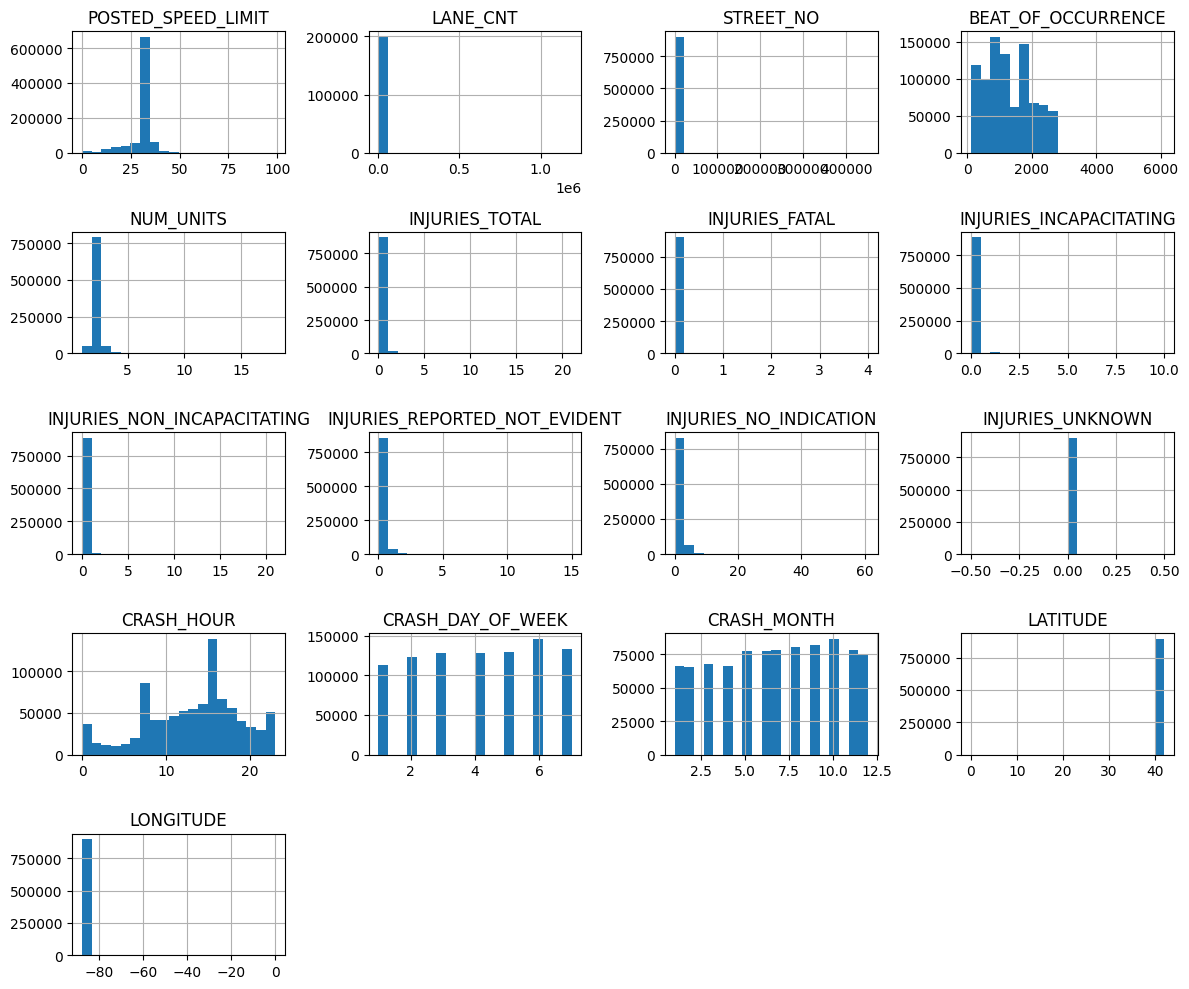

Plotting bar charts for categorical features (top 20 categories)...



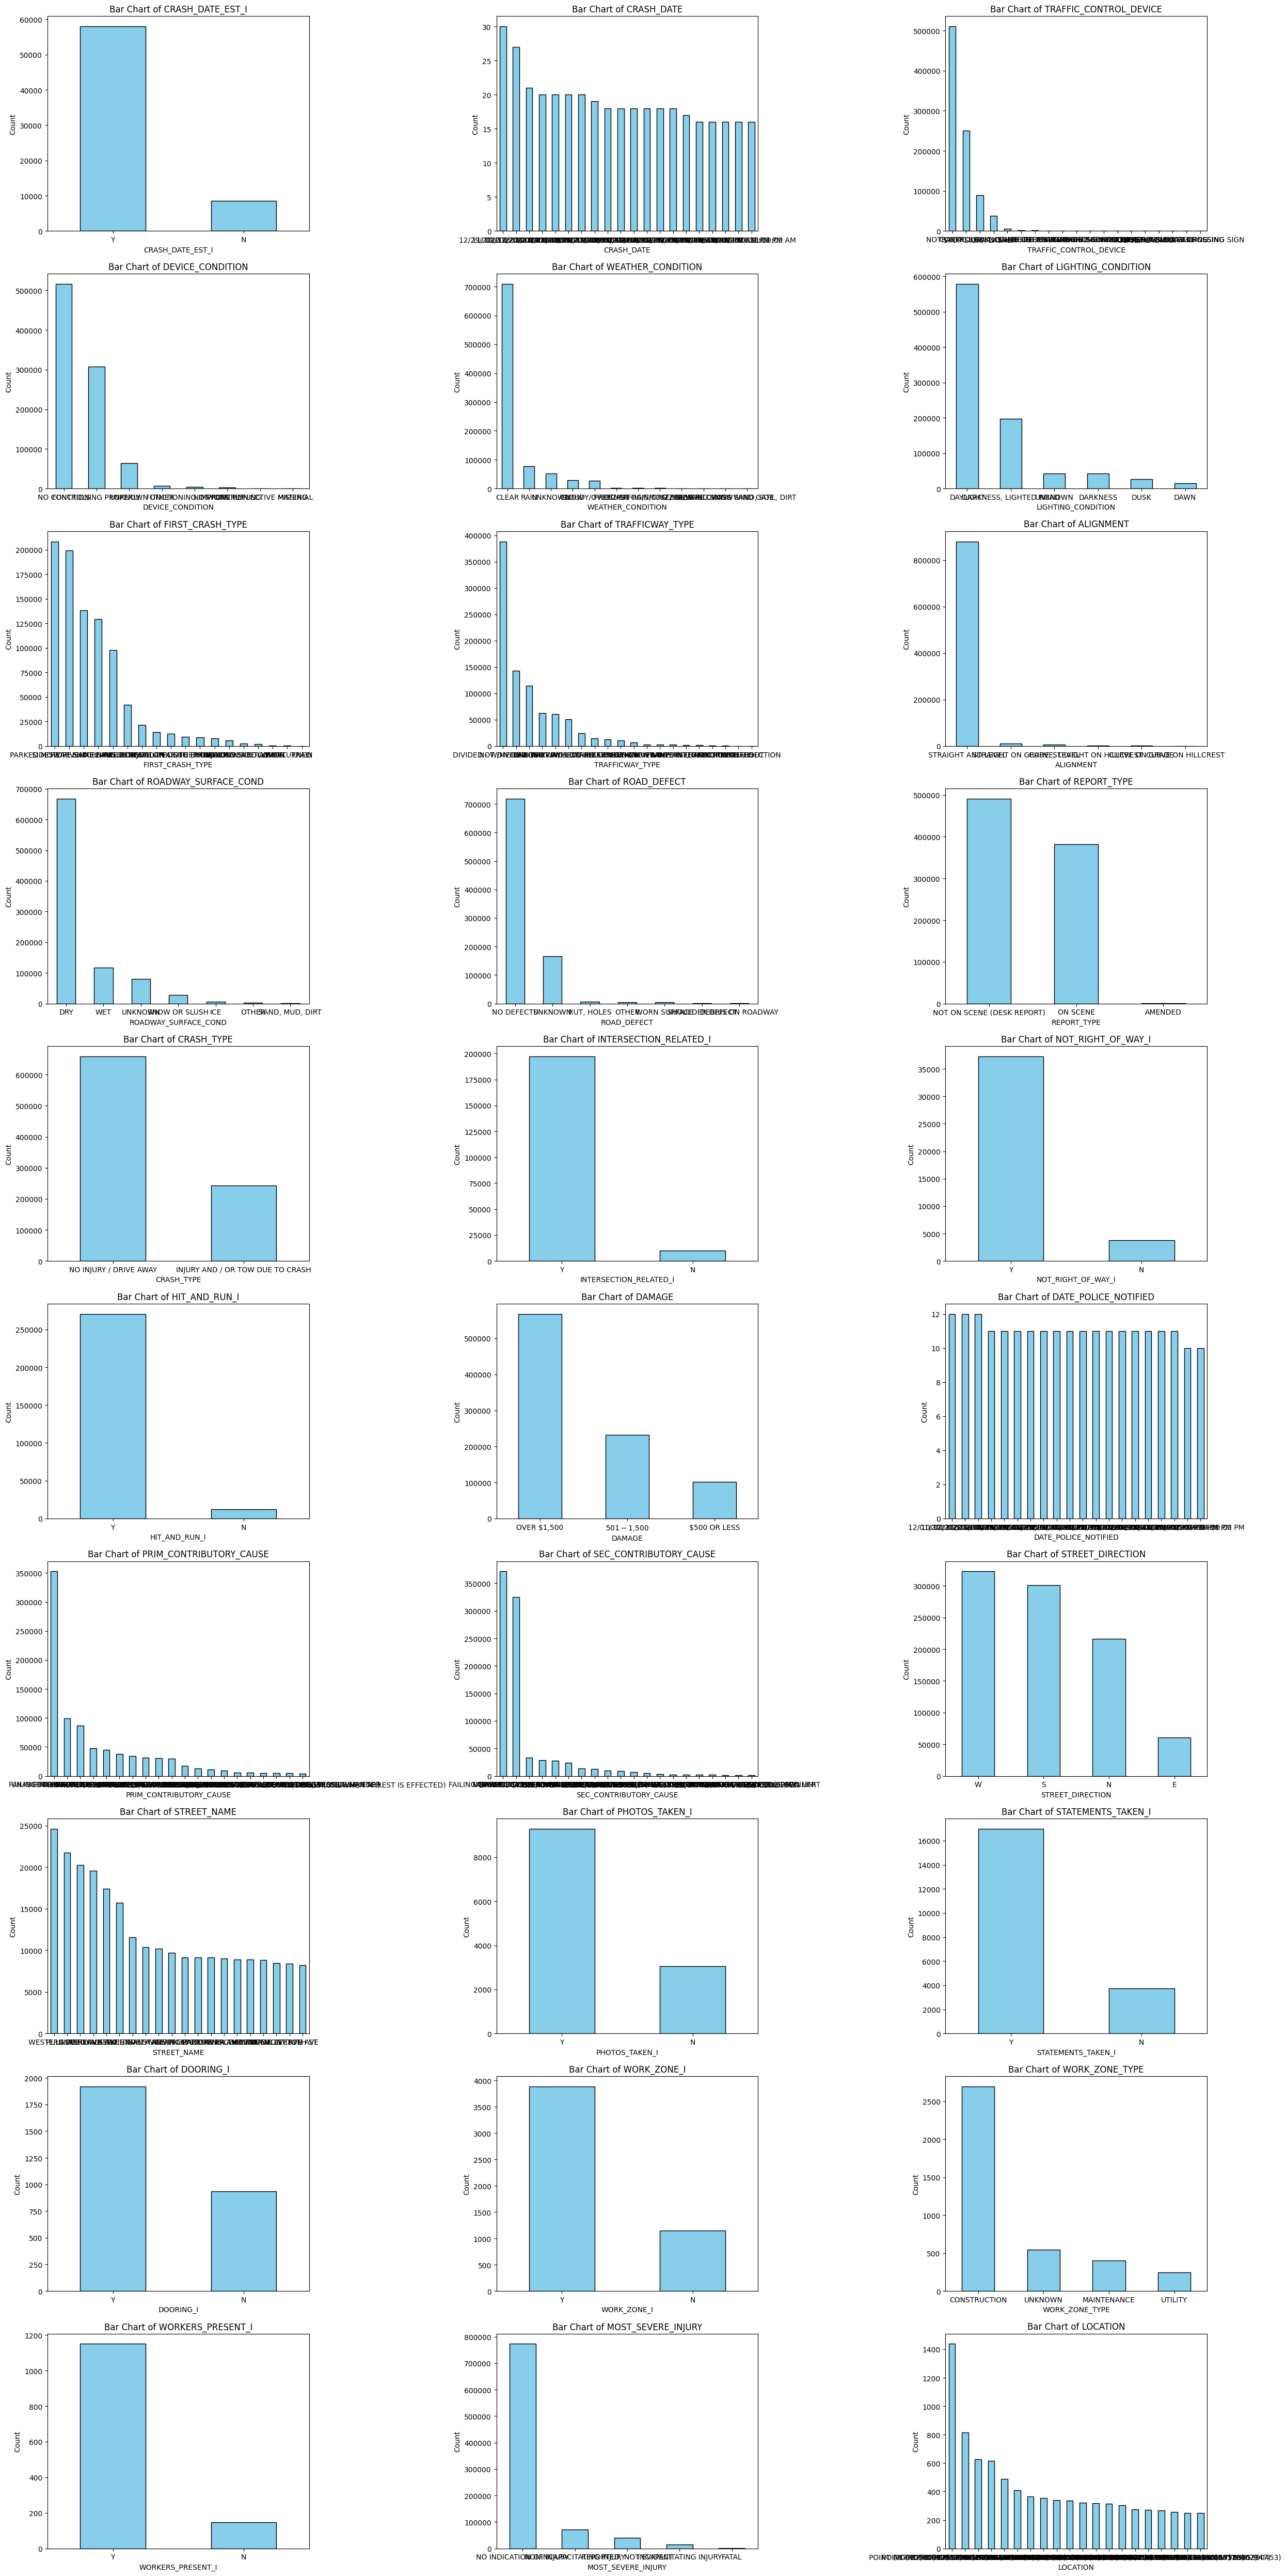

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



In [8]:
# Data understanding for Crashes dataset
crashes_df = dataset_understanding('./data/traffic_crashes.csv', date_col='CRASH_DATE')

### 2.2.2 People Dataset

Loading dataset from ./data/people.csv...

First 5 rows of the dataset:

  PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   O749947      DRIVER  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
1   O871921      DRIVER  af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...   
2    O10018      DRIVER  71162af7bf22799b776547132ebf134b5b438dcf3dac6b...   
3    O10038      DRIVER  c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...   
4    O10039      DRIVER  eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...   

   VEHICLE_ID              CRASH_DATE  SEAT_NO     CITY STATE ZIPCODE SEX  \
0    834816.0  09/28/2019 03:30:00 AM      NaN  CHICAGO    IL   60651   M   
1    827212.0  04/13/2020 10:50:00 PM      NaN  CHICAGO    IL   60620   M   
2      9579.0  11/01/2015 05:00:00 AM      NaN      NaN   NaN     NaN   X   
3      9598.0  11/01/2015 08:00:00 AM      NaN      NaN   NaN     NaN   X   
4      9600.0  11/01/2015 10:15:00 AM      NaN      NaN   NaN     NaN   X

Number of unique values: 14123

-------------------------------------------------- 

Value counts for column 'STATE':
IL    1380585
IN      22830
XX       9451
WI       7097
MI       5331
FL       3883
TX       3206
CA       2924
OH       2765
IA       2057
GA       1990
MN       1744
MO       1744
NY       1624
WA       1328
TN       1205
AZ       1016
NC        924
PA        857
CO        717
NJ        699
ID        696
KY        693
VA        617
MD        589
MS        560
MA        542
AL        522
NV        455
LA        439
AR        399
NB        370
SC        355
KS        345
OK        330
CT        222
OR        220
UT        167
NM        140
SD        113
ND        105
DC         94
MT         90
NH         75
HI         66
DE         65
ME         62
WV         60
WY         55
RI         48
AK         47
VT         37
Name: STATE, dtype: int64
Number of unique values: 52

-------------------------------------------------- 

Value counts for column 'ZIPCODE':
60629      

Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'PEDPEDAL_LOCATION':
IN ROADWAY         16868
IN CROSSWALK       12955
UNKNOWN/NA          3286
NOT IN ROADWAY      1715
BIKEWAY             1690
BIKE LANE           1526
DRIVEWAY ACCESS      554
SHOULDER             250
Name: PEDPEDAL_LOCATION, dtype: int64
Number of unique values: 8

-------------------------------------------------- 

Value counts for column 'BAC_RESULT':
TEST NOT OFFERED                   1554246
TEST REFUSED                         16163
TEST PERFORMED, RESULTS UNKNOWN       3715
TEST TAKEN                            2784
Name: BAC_RESULT, dtype: int64
Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'BAC_RESULT VALUE':
0.00    204
0.18    153
0.17    147
0.21    129
0.14    121
0.20    118
0.16    114
0.19    112
0.15     98
0.22     89
0.23     82
0.12     81
0.13     80
0.11     79
0.24     75
0.26     

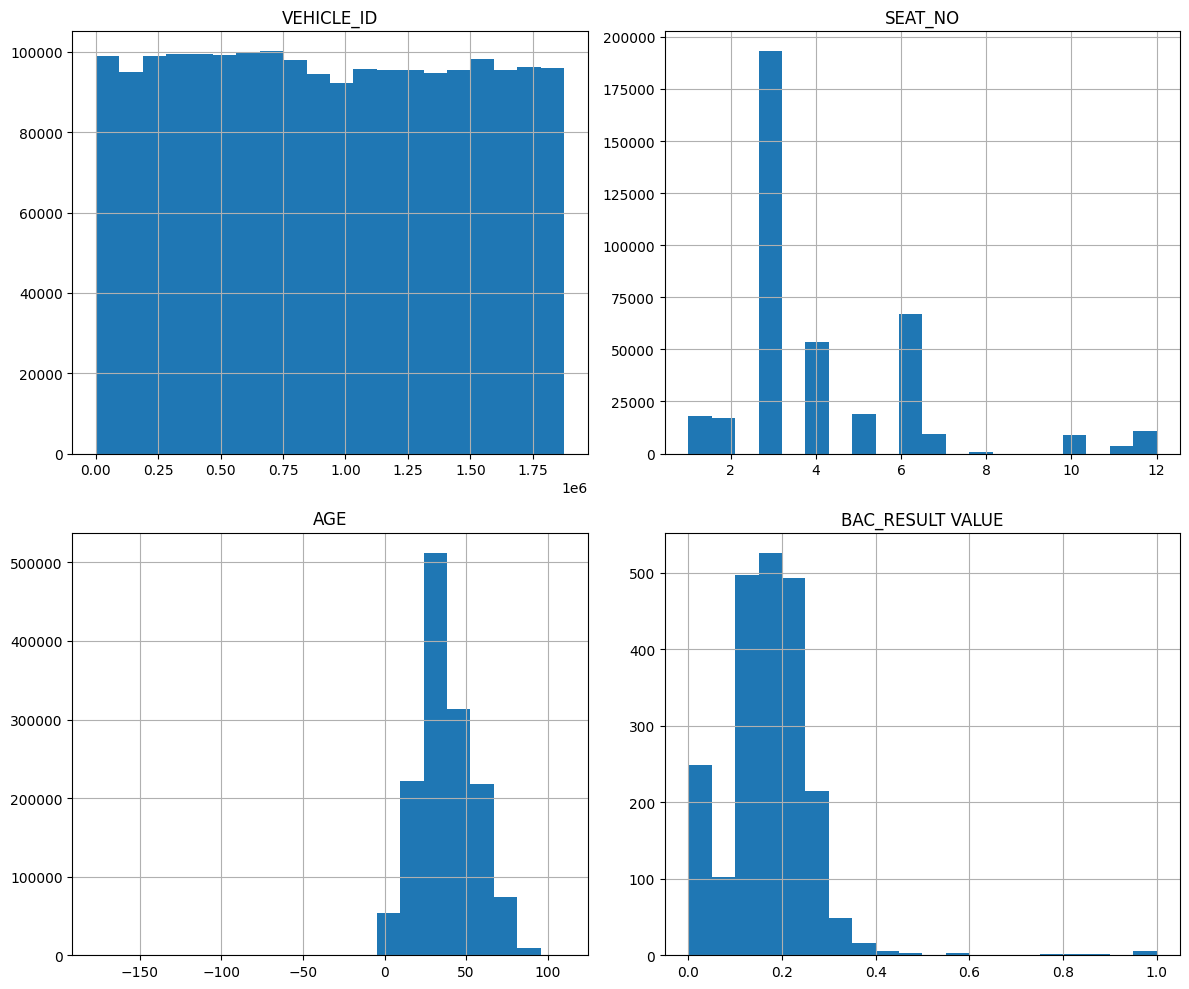

Plotting bar charts for categorical features (top 20 categories)...



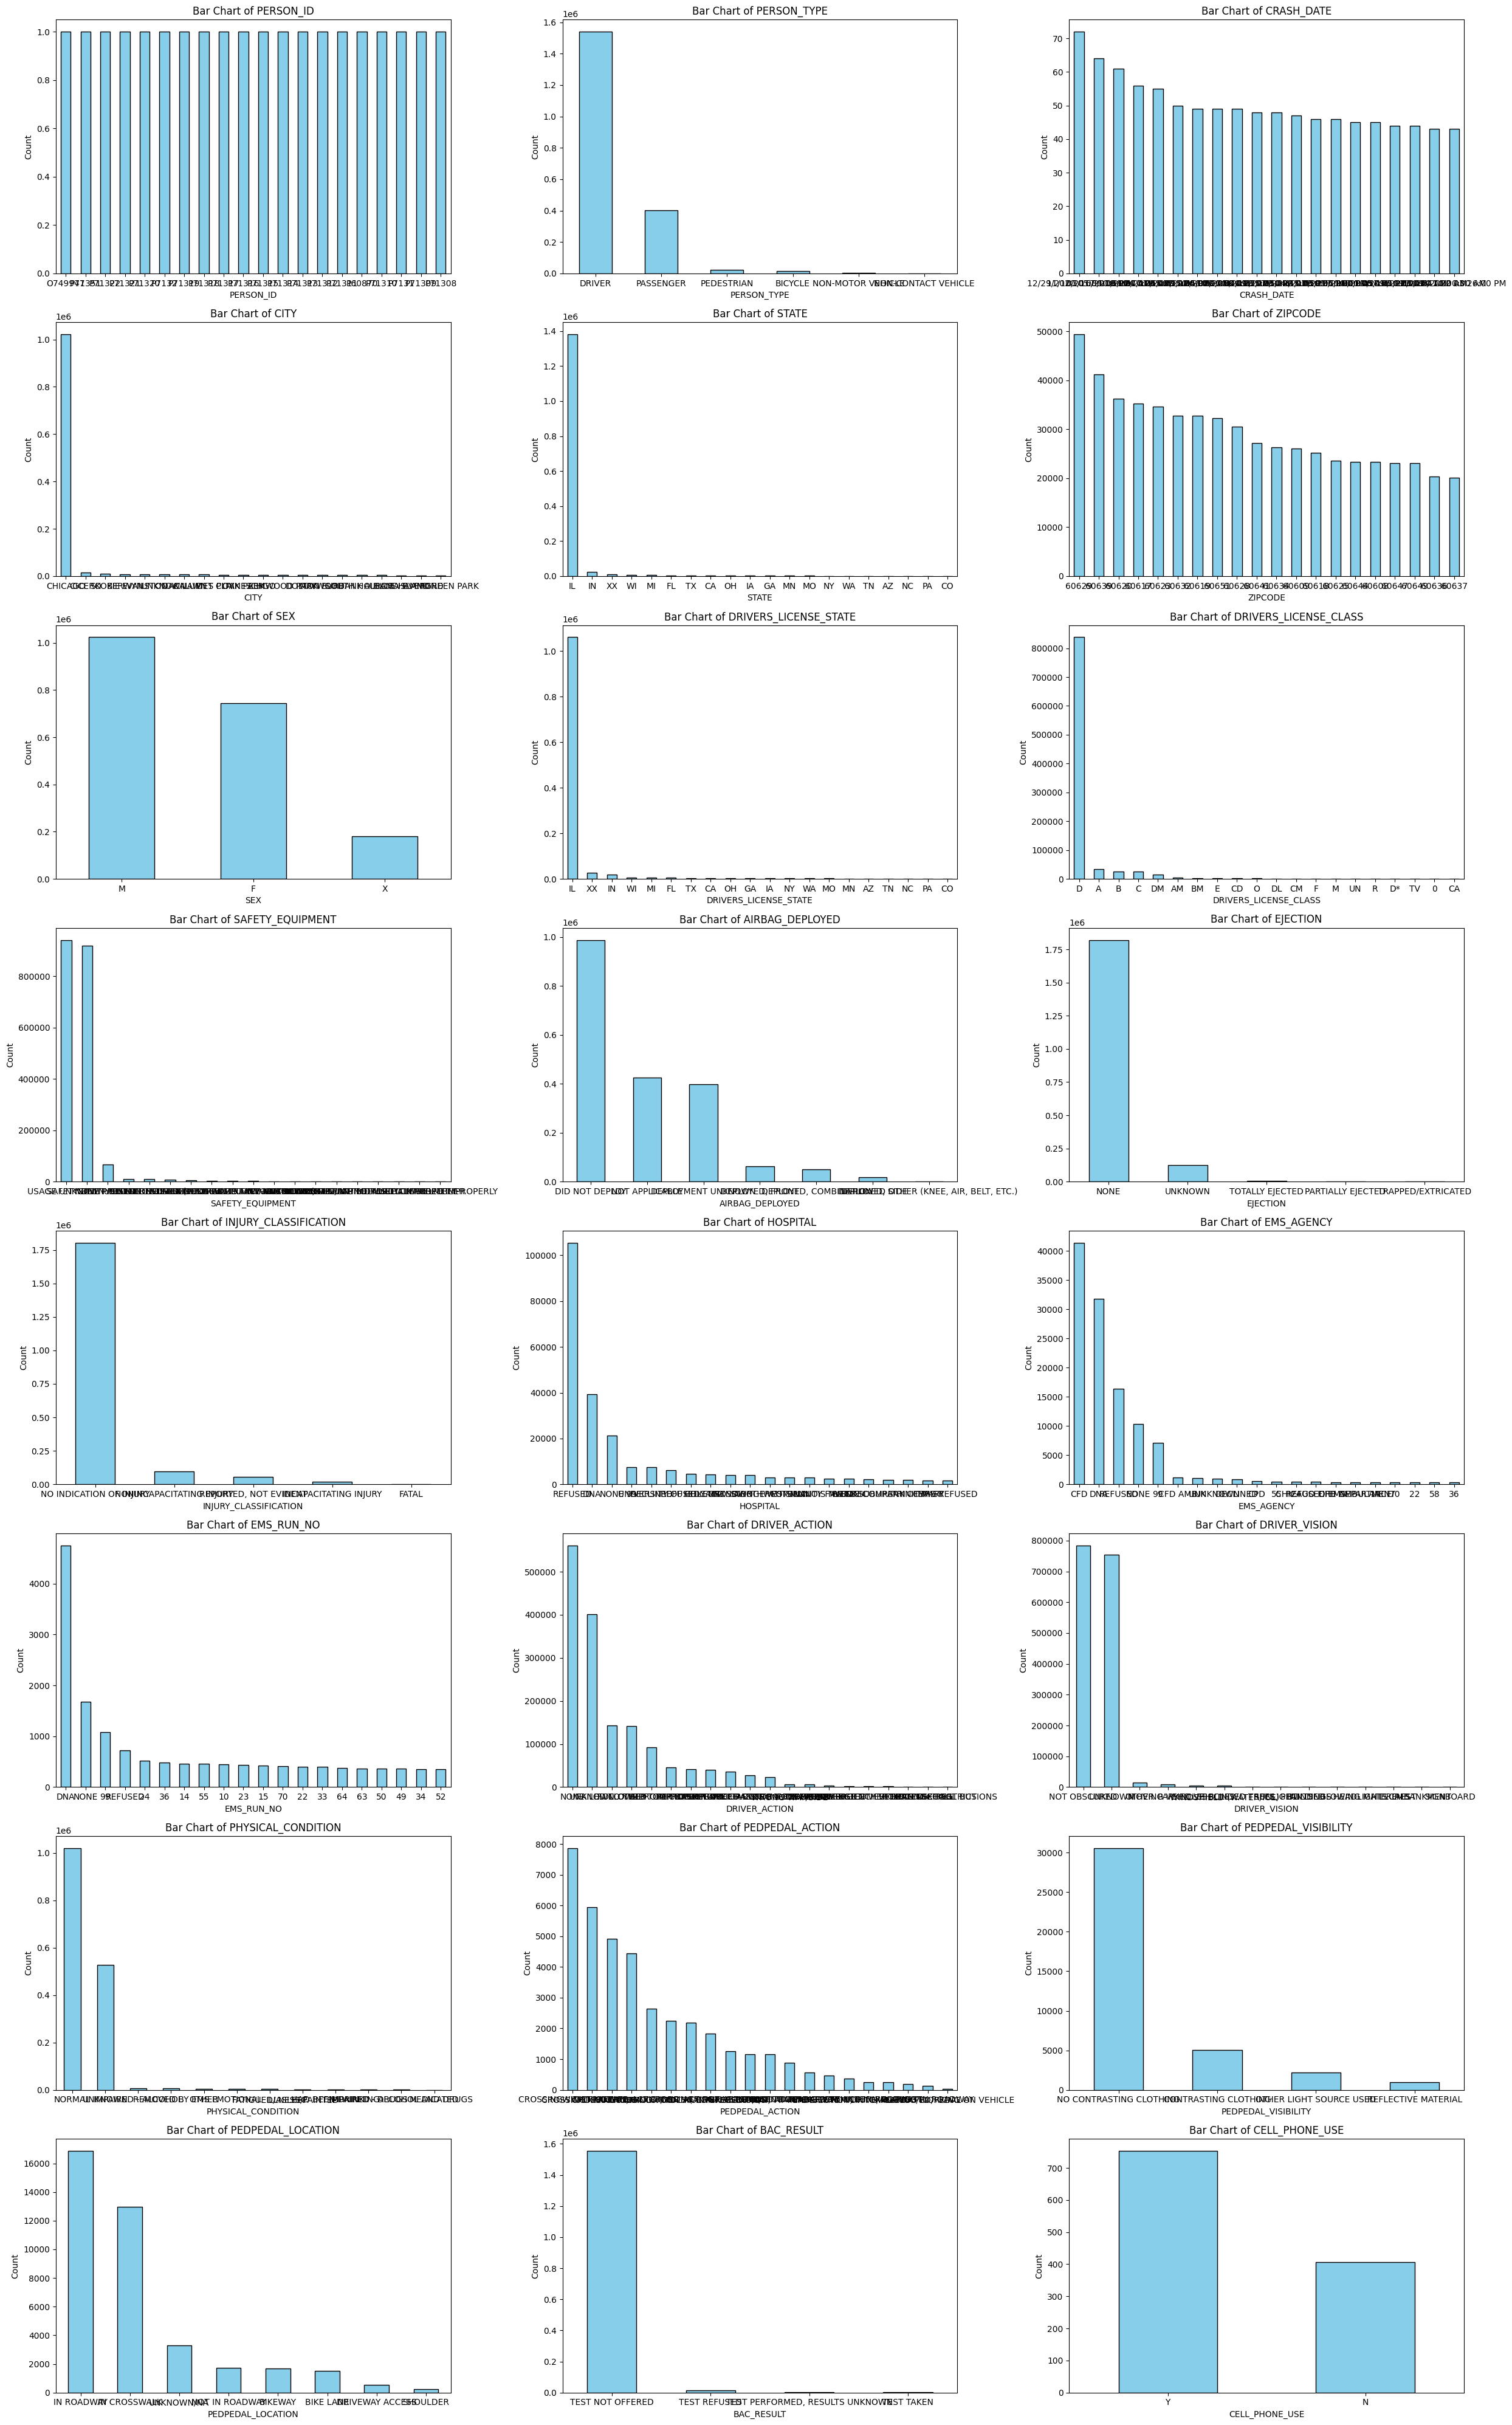

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



In [9]:
# Data understanding for People dataset
people_df = dataset_understanding('./data/people.csv', date_col = 'CRASH_DATE')

### 2.2.3 Vehicles Dataset

Loading dataset from ./data/vehicles.csv...

First 5 rows of the dataset:

   CRASH_UNIT_ID                                    CRASH_RECORD_ID  \
0        1717556  7b1763088507f77e0e552c009a6bf89a4d6330c7527706...   
1        1717574  2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...   
2        1717579  a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...   
3        1720118  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   
4        1720119  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   

               CRASH_DATE  UNIT_NO UNIT_TYPE  NUM_PASSENGERS  VEHICLE_ID  \
0  12/06/2023 03:24:00 PM        1    DRIVER             NaN   1634931.0   
1  12/06/2023 04:00:00 PM        2    DRIVER             NaN   1634978.0   
2  12/06/2023 04:30:00 PM        1    DRIVER             NaN   1634948.0   
3  12/10/2023 12:12:00 PM        1    DRIVER             NaN   1637401.0   
4  12/10/2023 12:12:00 PM        2    DRIVER             NaN   1637408.0   

  CMRC_VEH_I      MAKE    MODEL  ... TRAI

Number of unique values: 592945

-------------------------------------------------- 

Value counts for column 'UNIT_NO':
1          905826
2          853710
3           61407
4           12627
5            3368
6            1058
7             404
8             177
9              82
10             43
0              37
11             23
12             15
13             10
14              9
15              8
16              7
17              5
18              5
3778035         1
Name: UNIT_NO, dtype: int64
Number of unique values: 20

-------------------------------------------------- 

Value counts for column 'UNIT_TYPE':
DRIVER                 1539401
PARKED                  242214
PEDESTRIAN               23417
BICYCLE                  14716
DRIVERLESS               14540
NON-MOTOR VEHICLE         1665
NON-CONTACT VEHICLE        327
DISABLED VEHICLE           280
EQUESTRIAN                   8
Name: UNIT_TYPE, dtype: int64
Number of unique values: 9

-----------------------------------

Number of unique values: 9

-------------------------------------------------- 

Value counts for column 'MANEUVER':
STRAIGHT AHEAD                        831882
PARKED                                246368
UNKNOWN/NA                            136331
SLOW/STOP IN TRAFFIC                  130774
TURNING LEFT                          107438
BACKING                                72110
TURNING RIGHT                          60105
PASSING/OVERTAKING                     43818
CHANGING LANES                         34383
OTHER                                  30275
ENTERING TRAFFIC LANE FROM PARKING     21177
MERGING                                12694
U-TURN                                 10318
STARTING IN TRAFFIC                    10011
LEAVING TRAFFIC LANE TO PARK            8682
AVOIDING VEHICLES/OBJECTS               7538
SKIDDING/CONTROL LOSS                   6585
ENTER FROM DRIVE/ALLEY                  6313
PARKED IN TRAFFIC LANE                  5547
SLOW/STOP - LEFT TURN       

SIDE OF TRUCK    4990
DRIVER           4779
PAPERS           1495
LOG BOOK          871
Name: COMMERCIAL_SRC, dtype: int64
Number of unique values: 4

-------------------------------------------------- 

Value counts for column 'GVWR':
3           3915
2           1754
1           1227
80000       1192
26000        212
            ... 
29500          1
42,720LB       1
42,540LG       1
15595          1
12925          1
Name: GVWR, Length: 424, dtype: int64
Number of unique values: 424

-------------------------------------------------- 

Value counts for column 'CARRIER_NAME':
CHICAGO TRANSIT AUTHORITY    707
CTA                          345
UNKNOWN                      211
CITY OF CHICAGO              153
JB HUNT                      142
                            ... 
ZALA EXPRESS LLC               1
ROAD XPRESS                    1
TAKK TRANSPORTATION            1
APEX EXCAVATING INC            1
RYAN ALEN DERRICKSON           1
Name: CARRIER_NAME, Length: 11185, dtype: int64
Numbe

Number of unique values: 8

-------------------------------------------------- 

Value counts for column 'CARGO_BODY_TYPE':
VAN/ENCLOSED BOX    6249
OTHER               3370
BUS                 2444
FLATBED             1126
DUMP                 498
GARBAGE/REFUSE       438
TANK                 281
AUTO TRANSPORTER     135
CONCRETE MIXER       134
Name: CARGO_BODY_TYPE, dtype: int64
Number of unique values: 9

-------------------------------------------------- 

Value counts for column 'LOAD_TYPE':
OTHER                     7617
UNKNOWN                   5593
CONSTRUCTION EQUIPMENT     469
BUILDING MATERIALS         261
STEEL COILS                 54
FARM EQUIPMENT              22
Name: LOAD_TYPE, dtype: int64
Number of unique values: 6

-------------------------------------------------- 

Value counts for column 'HAZMAT_OUT_OF_SERVICE_I':
N    12796
Y       18
Name: HAZMAT_OUT_OF_SERVICE_I, dtype: int64
Number of unique values: 2

-------------------------------------------------- 

Va

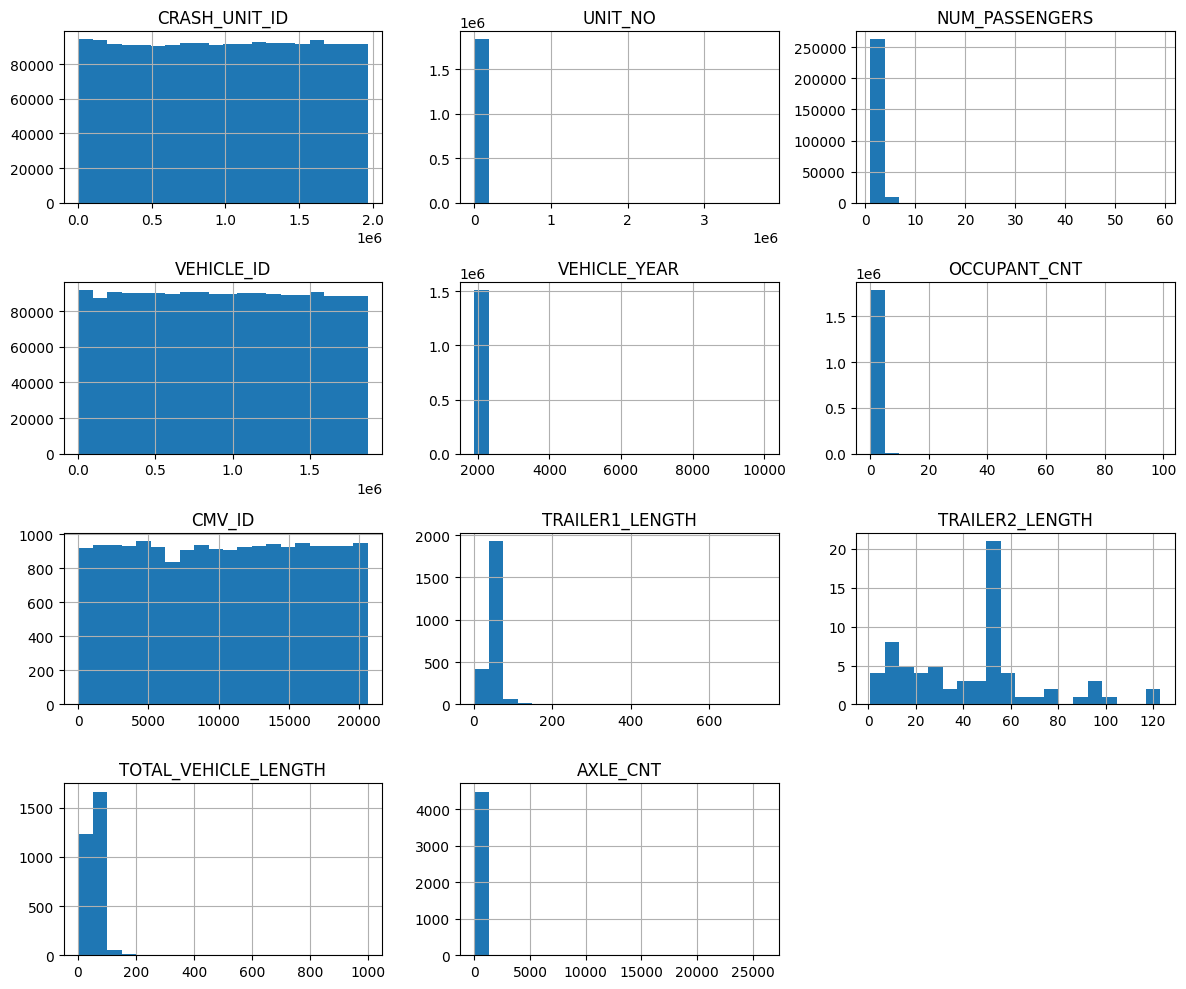

Plotting bar charts for categorical features (top 20 categories)...



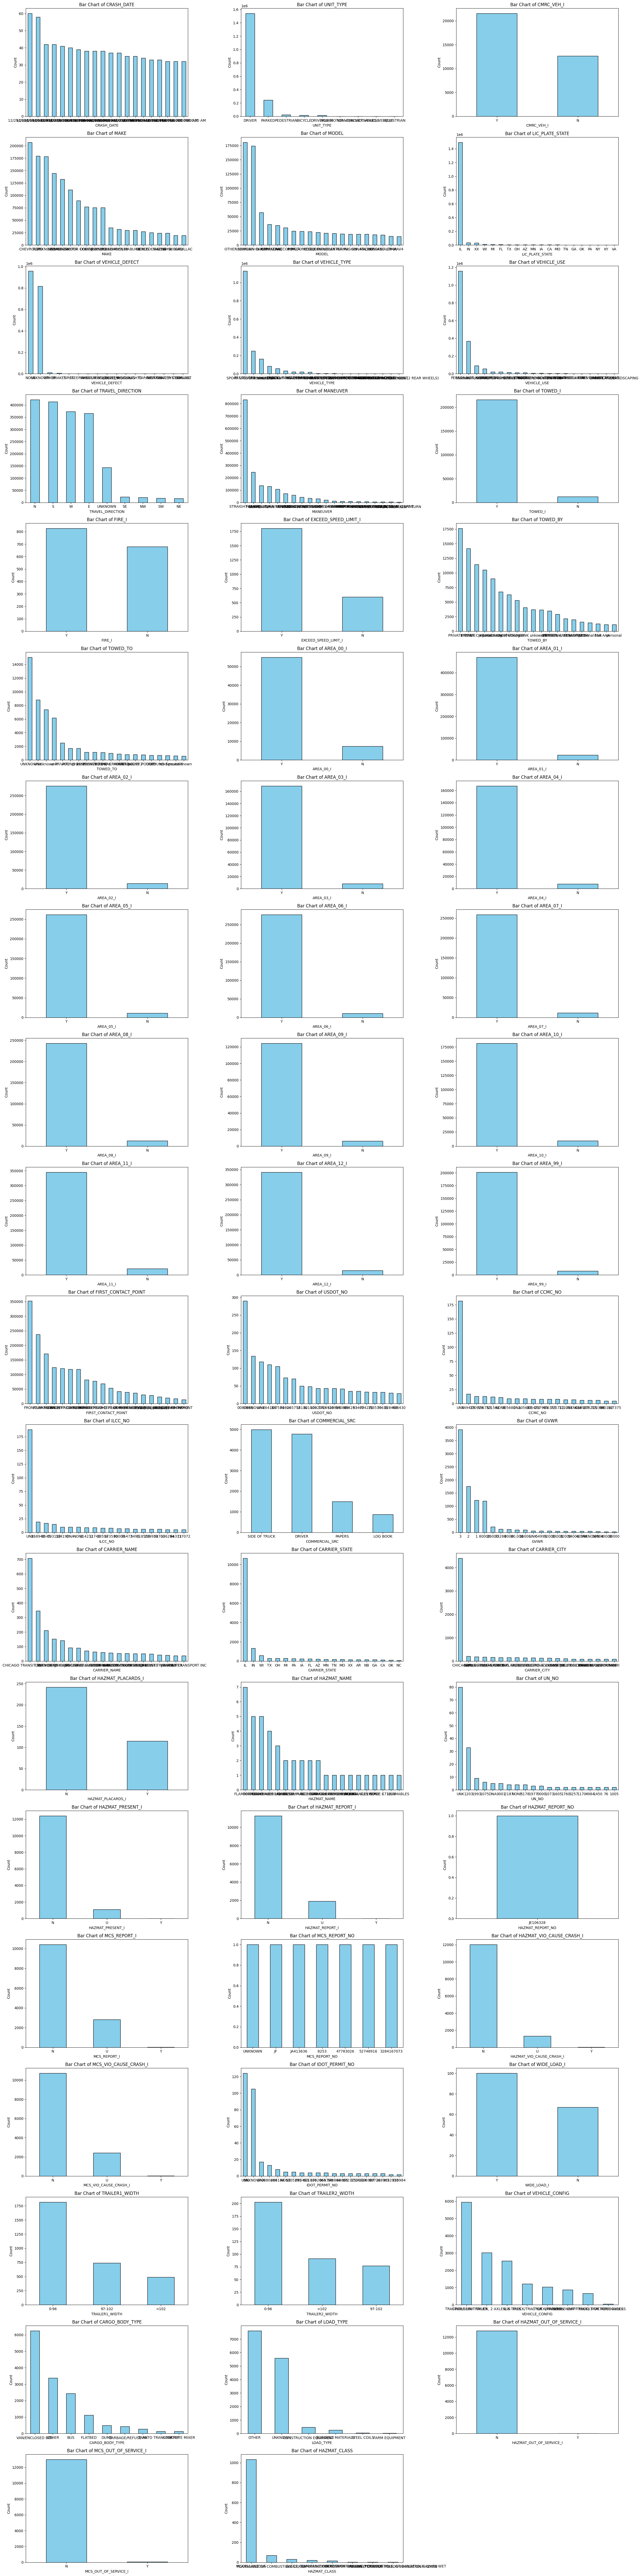

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



In [10]:
# Data understanding for Vehicles dataset
vehicles_df = dataset_understanding('./data/vehicles.csv', date_col = 'CRASH_DATE')

## 3. <a name ="Data-Preparation"></a> Data Preparation

I completed my data cleaning in a separate notebook and saved my steps in the following .py file. Loading and runnning the file will perform the same cleaning steps I ..."

## 4. <a name ="Exploratory-Data-Analysis"></a>Exploratory Data Analysis (EDA)

## 5. <a name ="Modeling"></a>  Modeling

## 6. <a name ="Evaluation"></a> Evaluation

## 7. <a name ="Conclusion"></a> Conclusion

### 7.1 <a name ="Limitations"></a> Limitations

### 7.2 <a name ="Recommendations"></a> Recommendations

### 7.3 <a name ="Next-Steps"></a> Next Steps

## 8. References

1. City of Philadelphia. (2024). *Vision Zero Annual Report 2024*. Philadelphia.gov. https://visionzerophl.com/plans-and-reports/annual-report-2024/